In [46]:
%config Completer.use_jedi = False

In [47]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt
from scipy import stats
from sklearn.svm import SVR, NuSVR
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

In [48]:
df_7 = pd.read_csv("data7.csv", header=None, sep=";")

In [49]:
df_7.columns = ["Date", "Value"]
df_7 = df_7.drop(columns=["Date"])

In [50]:
print(df_7.shape)

(1493, 1)


In [51]:
def remove_zeros(df):
    df.loc[~(df==0).all(axis=1)]
    return df

((array([-3.31139706, -3.05464103, -2.91188422, ...,  2.91188422,
          3.05464103,  3.31139706]),
  array([  0.,   0.,   0., ..., 990., 990., 990.])),
 (45.393009804153166, 32.4182632283992, 0.4975124111103))

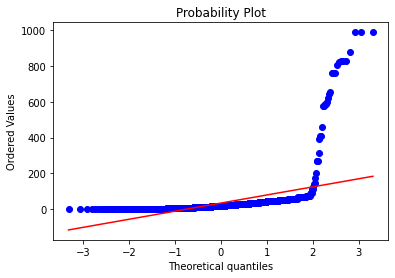

In [52]:
stats.probplot(df_7["Value"], plot=sns.mpl.pyplot)

### Function for predicting output

In [53]:
def predict_data(df, C:float, max_iter):
    n = df.shape[0]
    norm_df = remove_zeros(df)
    norm_df = norm_df[norm_df["Value"] <= 150]
    df["Value"] = df["Value"].fillna(df["Value"].mean())
    df['Value'] = df['Value'].apply(lambda y: y if y <= 150 else df["Value"].mean())
    X = np.array([i for i in range(1, n + 1)]).reshape(-1, 1)
    X = np.array([i for i in range(1, n + 1)]).reshape(-1, 1)
    new_dates_15 = np.array([i for i in range(1, n + 16)]).reshape(-1, 1)
    new_dates_30 = np.array([i for i in range(1, n + 31)]).reshape(-1, 1)
    new_dates_45 = np.array([i for i in range(1, n + 46)]).reshape(-1, 1)
    svr_model = SVR(C=C, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, max_iter=-1, 
                    gamma=0.001, kernel="rbf",shrinking=True, tol=0.001, verbose=True)  # vectors model
    mlp_model = MLPRegressor( activation="logistic", shuffle=True, 
                            max_iter=max_iter, alpha=0.001, solver="lbfgs", tol=0.00001)  # Batch size ~ N // 100
    svr_model.fit(X=X, y=df["Value"])
    mlp_model.fit(X=X, y=df["Value"])
    
    #  Predicting using SVR model:
    res_15_svr = svr_model.predict(new_dates_15)
    res_30_svr = svr_model.predict(new_dates_30)
    res_45_svr = svr_model.predict(new_dates_45)
    
    # Predicting using MLP model:
    res_15_mlp = mlp_model.predict(new_dates_15)
    res_30_mlp = mlp_model.predict(new_dates_30)
    res_45_mlp = mlp_model.predict(new_dates_45)
    svr_score = svr_model.score(X, df["Value"], None)
    mlp_score = mlp_model.score(X, df["Value"], None)
    print("SVR score", svr_score)
    print("MLP score", mlp_score)
    return (res_15_svr, res_30_svr, res_45_svr, 
            res_15_mlp, res_30_mlp, res_45_mlp, df)

## TD8-TCE Dataset

In [54]:
df_8 = pd.read_csv("data8.csv", header=None)
df_8.columns = ["Value"]

In [55]:
print("Num of vals =", df_8.shape[0])

Num of vals = 1493


In [56]:
df_8.head()

,Value
0,31.375
1,30.202
2,30.202
3,30.202
4,29.877


In [64]:
res_7_15_svr, res_7_30_svr, res_7_45_svr, res_7_15_mlp, res_7_30_mlp, res_7_45_mlp, df_7 = predict_data(df_7, C=0.1,
                                                                                                       max_iter=4000) 

[LibSVM]

/home/dimdimi4/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVR score 0.21543654769824405
MLP score 0.5169444202650831


<AxesSubplot:title={'center':'TD7 with SVR'}>

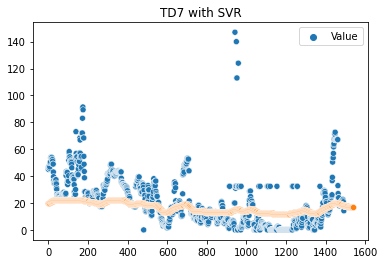

In [58]:
sns.scatterplot(data=df_7).set_title("TD7 with SVR")
sns.scatterplot(data=res_7_45_svr)

<AxesSubplot:title={'center':'TD7 with MLP'}>

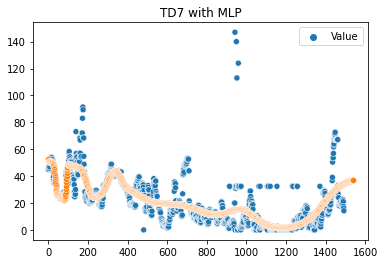

In [65]:
sns.scatterplot(data=df_7).set_title("TD7 with MLP")
sns.scatterplot(data=res_7_45_mlp)

In [42]:
df_8 = pd.read_csv("data8.csv")
df_8.columns = ["Value"]
res_8_15_svr, res_8_30_svr, res_8_45_svr, res_8_15_mlp, res_8_30_mlp, res_8_45_mlp, df_8 = predict_data(df_8,
                                                                                                       C=0.05,
                                                                                                       max_iter=4000)

[LibSVM]

/home/dimdimi4/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVR score 0.23405388525279391
MLP score 0.9156006227245721


<AxesSubplot:title={'center':'TD8 with SVR'}>

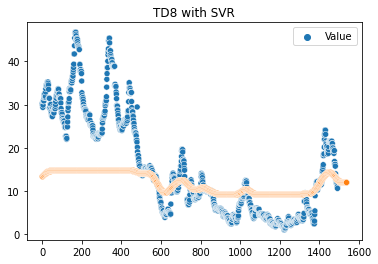

In [31]:
sns.scatterplot(data=df_8).set_title("TD8 with SVR")
sns.scatterplot(data=res_8_45_svr)

<AxesSubplot:title={'center':'TD8'}>

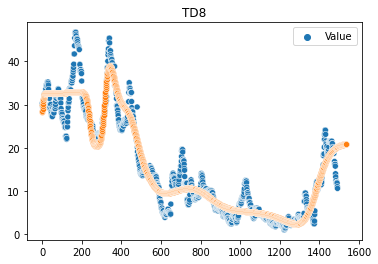

In [43]:
sns.scatterplot(data=df_8).set_title("TD8")
sns.scatterplot(data=res_8_45_mlp)

In [44]:
print(res_8_45_mlp[-10:])

[20.86085679 20.86818519 20.87524708 20.88205017 20.88860198 20.89490985
 20.90098093 20.90682218 20.91244042 20.91784225]


In [45]:
print(res_8_45_svr[-10:])

[12.06038583 12.06086777 12.06153466 12.06235279 12.06329166 12.0643238
 12.06542473 12.06657272 12.06774875 12.06893624]


In [66]:
df_9 = pd.read_csv("data9.csv")
df_9.columns = ["Value"]

In [67]:
res_9_15_svr, res_9_30_svr, res_9_45_svr, res_9_15_mlp, res_9_30_mlp, res_9_45_mlp, df_9 = predict_data(df_9, C=0.1,
                                                                                                       max_iter=4000)

[LibSVM]SVR score 0.21800767149481004
MLP score 0.5573137479784963


<AxesSubplot:title={'center':'TD9 with SVR'}>

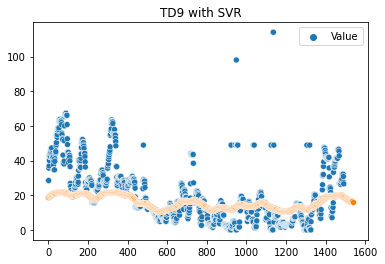

In [65]:
sns.scatterplot(data=df_9).set_title("TD9 with SVR")
sns.scatterplot(data=res_9_45_svr)

<AxesSubplot:title={'center':'TD9 with MLP'}>

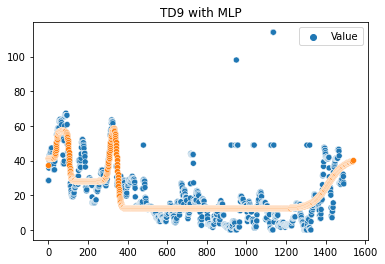

In [69]:
sns.scatterplot(data=df_9).set_title("TD9 with MLP")
sns.scatterplot(data=res_9_45_mlp)

In [70]:
df_14 = pd.read_csv("data14.csv")
df_14.columns = ["Value"]
res_14_15_svr, res_14_30_svr, res_14_45_svr, res_14_15_mlp, res_14_30_mlp, res_14_45_mlp, df_14 = predict_data(df_14, C=0.1, 
                                                                                                              max_iter=4000)

[LibSVM]SVR score 0.41098156448675294
MLP score 0.7518753142116072


<AxesSubplot:title={'center':'TD14'}>

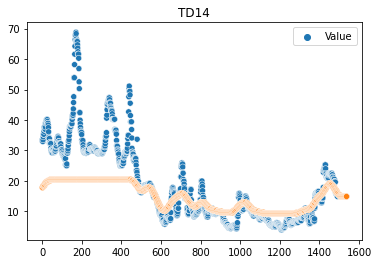

In [71]:
sns.scatterplot(data=df_14).set_title("TD14")
sns.scatterplot(data=res_14_45_svr)

<AxesSubplot:title={'center':'TD14'}>

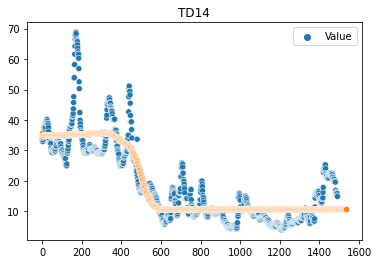

In [72]:
sns.scatterplot(data=df_14).set_title("TD14")
sns.scatterplot(data=res_14_45_mlp)

In [73]:
df_17 = pd.read_csv("data17.csv")
df_17.columns = ["Value"]
res_17_15_svr, res_17_30_svr, res_17_45_svr, res_17_15_mlp, res_17_30_mlp, res_17_45_mlp, df_17 = predict_data(df_17, C=0.1, 
                                                                                                              max_iter=4000)

[LibSVM]

/home/dimdimi4/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVR score 0.23201446207704923
MLP score 0.5363948676773577


<AxesSubplot:title={'center':'TD17'}>

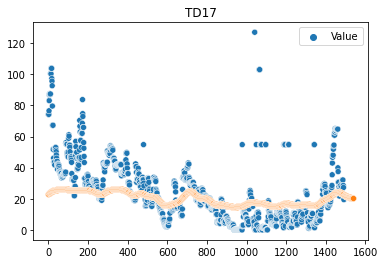

In [74]:
sns.scatterplot(data=df_17).set_title("TD17")
sns.scatterplot(data=res_17_45_svr)

<AxesSubplot:title={'center':'TD17 with MLP'}>

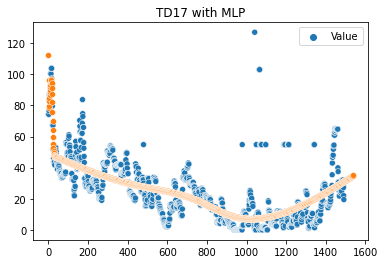

In [75]:
sns.scatterplot(data=df_17).set_title("TD17 with MLP")
sns.scatterplot(data=res_17_45_mlp)

In [76]:
df_19 = pd.read_csv("data19.csv")
df_19.columns = ["Value"]
res_19_15_svr, res_19_30_svr, res_19_45_svr, res_19_15_mlp, res_19_30_mlp, res_19_45_mlp, df_19 = predict_data(df_19, C=0.1, 
                                                                                                              max_iter=4000)

[LibSVM]SVR score 0.24815975191228812
MLP score 0.44996708614533754


<AxesSubplot:title={'center':'TD19'}>

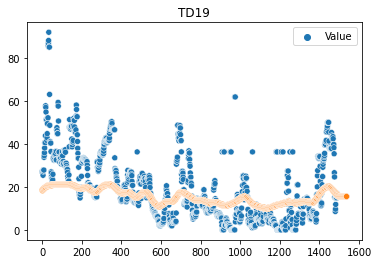

In [77]:
sns.scatterplot(data=df_19).set_title("TD19")
sns.scatterplot(data=res_19_45_svr)

<AxesSubplot:title={'center':'TD19 with MLP'}>

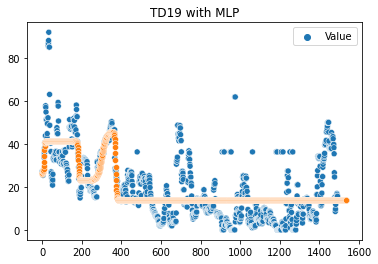

In [78]:
sns.scatterplot(data=df_19).set_title("TD19 with MLP")
sns.scatterplot(data=res_19_45_mlp)

### Packing all data in .csv files

In [79]:
def create_csv(name, res1_svr, res2_svr, res3_svr, 
              res1_mlp, res2_mlp, res3_mlp):
    max_len = max(max(len(res1_svr), len(res2_svr)), len(res3_svr))
    for i in range(max_len):
        try:
            x = res1_svr[i]
        except Exception:
            res1_svr = np.append(res1_svr, [0], axis=0)
            res1_mlp = np.append(res1_mlp, [0], axis=0)
        try:
            x = res2_svr[i]
        except Exception:
            res2_svr = np.append(res2_svr, [0], axis=0)
            res2_mlp = np.append(res2_mlp, [0], axis=0)
        try:
            x = res3_svr[i]
        except Exception:
            res3_svr = np.append(res3_svr, [0], axis=0)
            res3_mlp = np.append(res3_mlp, [0], axis=0)
    df = pd.DataFrame({
        "res15_svr": res1_svr * 1000,
        "res30_svr": res2_svr * 1000, 
        "res45_svr": res3_svr * 1000,
        "res15_mlp": res1_mlp * 1000, 
        "res30_mlp": res2_mlp * 1000,
        "res45_mlp": res3_mlp * 1000
    })
    df.to_csv(name, index=False)

In [80]:
create_csv("res_14.csv", res_14_15_svr, res_14_30_svr, res_14_45_svr, res_14_15_mlp, res_14_30_mlp, res_14_45_mlp)

In [81]:
create_csv("res_17.csv", res_17_15_svr, res_17_30_svr, res_17_45_svr, res_17_15_mlp, res_17_30_mlp, res_17_45_mlp)

In [82]:
create_csv("res_19.csv", res_19_15_svr, res_19_30_svr, res_19_45_svr, res_19_15_mlp, res_19_30_mlp, res_19_45_mlp)

In [83]:
create_csv("res_7.csv", res_7_15_svr, res_7_30_svr, res_7_45_svr, res_7_15_mlp, res_7_30_mlp, res_7_45_mlp)

In [84]:
create_csv("res_8.csv", res_8_15_svr, res_8_30_svr, res_8_45_svr, res_8_15_mlp, res_8_30_mlp, res_8_45_mlp)

In [85]:
create_csv("res_9.csv", res_9_15_svr, res_9_30_svr, res_9_45_svr, res_9_15_mlp, res_9_30_mlp, res_9_45_mlp)

In [86]:
print(res_7_45_mlp.shape)

(1538,)


In [87]:
print((res_7_45_mlp * 1000)[:10])

[52974.15786056 51026.74248064 50996.45466583 50991.76808904
 50987.50344806 50982.1508531  50975.29028723 50966.48539725
 50955.1833175  50940.67550392]
